# Assignment 2 : Cohort characterisation and clustering

In this assignment I will demonstrate the techniques to identify cluster of patients and analyise whether they have clinical meaning and correctly evaulate the patient cohorts.

Index:


1.   Prepare Dataset
2.   



## Install Pre-Requirements

In [53]:
%pip install kneed

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator
from sklearn.decomposition import PCA

## Read Hypotension Dataset Using Pandas and Print Summary

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/hypotension_patients.csv")

# Summary statistics
summary = data.describe()

print(summary)

# Count the number of null values in each column
null_values = data.isnull().sum()

# Display the number of null values per column
print("Number of null values in each column:\n", null_values)

                ID   anchor_age       apsiii          LoS  \
count  5106.000000  5106.000000  5106.000000  5106.000000   
mean   2553.500000    65.552683    60.314532     7.053651   
std    1474.119568    15.235907    28.860171     8.432716   
min       1.000000    18.000000     3.000000     0.040000   
25%    1277.250000    56.000000    38.000000     1.960000   
50%    2553.500000    67.000000    53.000000     4.130000   
75%    3829.750000    77.000000    78.000000     8.960000   
max    5106.000000    91.000000   189.000000   103.500000   

       charlson_comorbidity_index  
count                  5106.00000  
mean                      5.21700  
std                       2.57691  
min                       0.00000  
25%                       4.00000  
50%                       5.00000  
75%                       7.00000  
max                      19.00000  
Number of null values in each column:
 ID                               0
anchor_age                       0
gender           

## Create Indicagtor of Patients Death According to Date of Death Column.

In [ ]:
# Create a new column 'death_indicator': 1 if 'dod' is not null (patient died), 0 if 'dod' is null (patient survived)
data['death_indicator'] = data['dod'].notnull().astype(int)

# Remove 'ID' and 'dod' columns
data = data.drop(columns=['ID', 'dod'])

## Conver Categorical Gender Data to 0 and 1

In [ ]:
# Convert gender: M -> 0 (Male), F -> 1 (Female)
data['gender'] = data['gender'].replace({'M': 0, 'F': 1})

## Plot Summary of each column

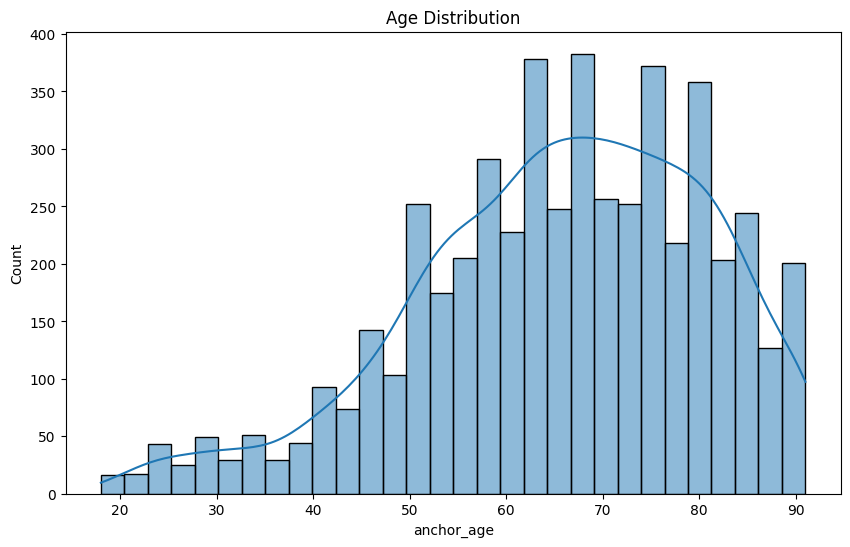

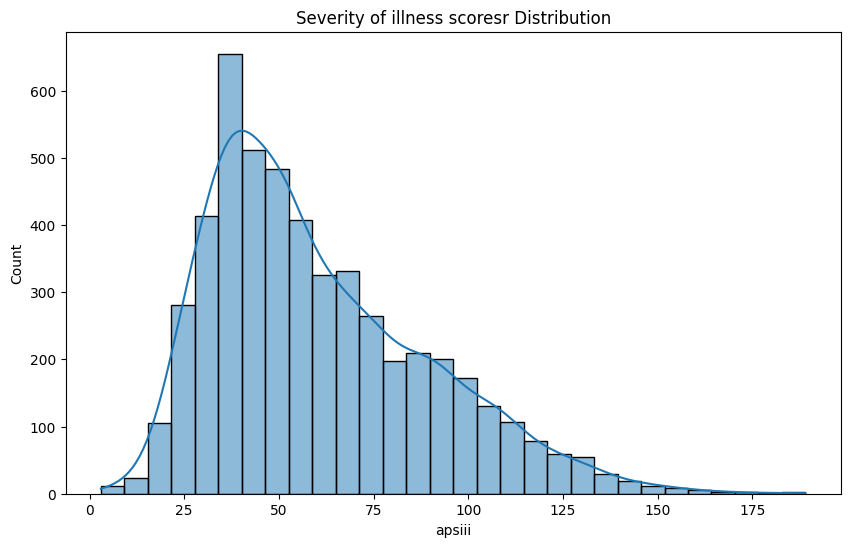

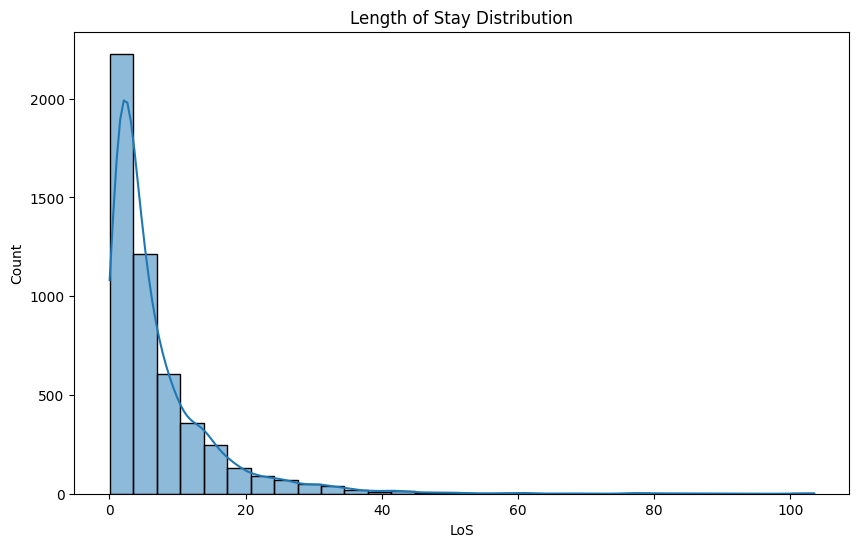

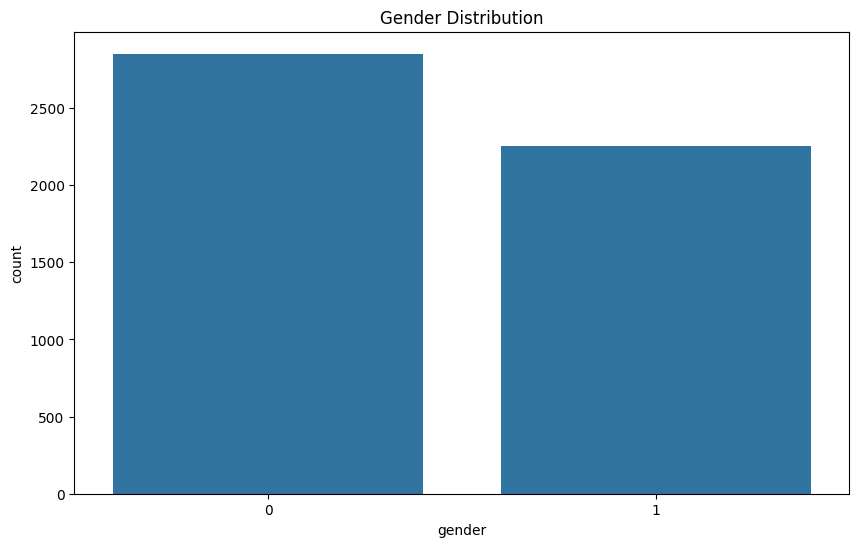

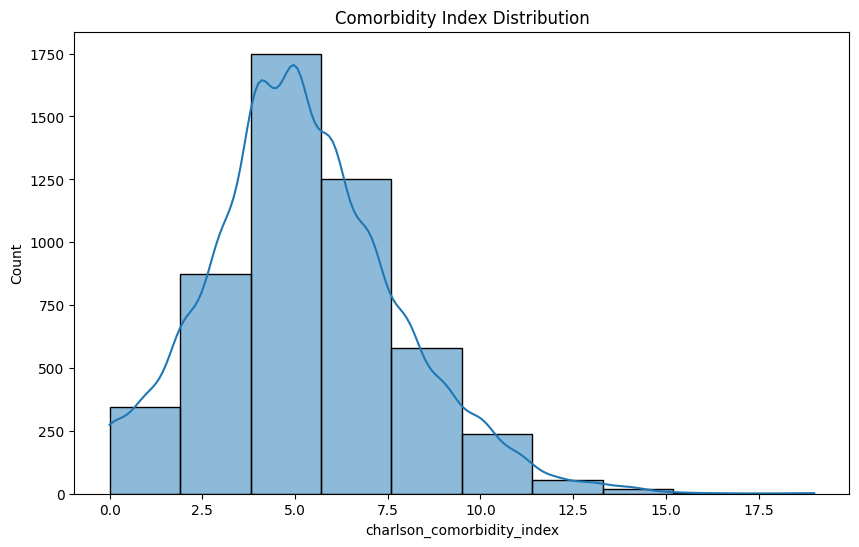

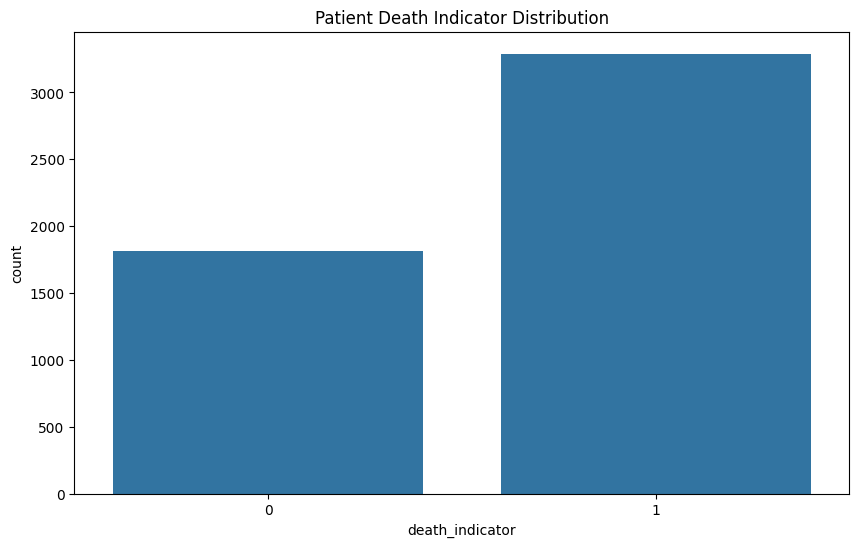

In [ ]:
# Anchor Age Summary
plt.figure(figsize=(10,6))
sns.histplot(data['anchor_age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# apsiii Summary
plt.figure(figsize=(10,6))
sns.histplot(data['apsiii'], bins=30, kde=True)
plt.title('Severity of illness scoresr Distribution')
plt.show()

# LoS Summary
plt.figure(figsize=(10,6))
sns.histplot(data['LoS'], bins=30, kde=True)
plt.title('Length of Stay Distribution')
plt.show()

# Gender Summary
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Comorbidity Index Summary
plt.figure(figsize=(10,6))
sns.histplot(data['charlson_comorbidity_index'], bins=10, kde=True)
plt.title('Comorbidity Index Distribution')
plt.show()

# Patient Death Indication Summary
plt.figure(figsize=(10,6))
sns.countplot(x='death_indicator', data=data)
plt.title('Patient Death Indicator Distribution')
plt.show()



## Explain the Summary

## Perform K-Means Clustering to Identify Subgrouops of Patients

## Preprocess Dataset

In [ ]:

# Select relevant columns for clustering
features = ['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

print(scaled_df.head())


   anchor_age    apsiii       LoS  charlson_comorbidity_index
0    0.948334 -0.149512 -0.006363                   -0.472317
1    0.423207 -0.392085  0.695734                    0.303882
2    1.079616 -0.496045  0.720639                   -0.084217
3    1.539102  0.890084 -0.253045                    0.691982
4    0.226285  1.444536  0.522581                    1.080082


## Show K-Means Cluster

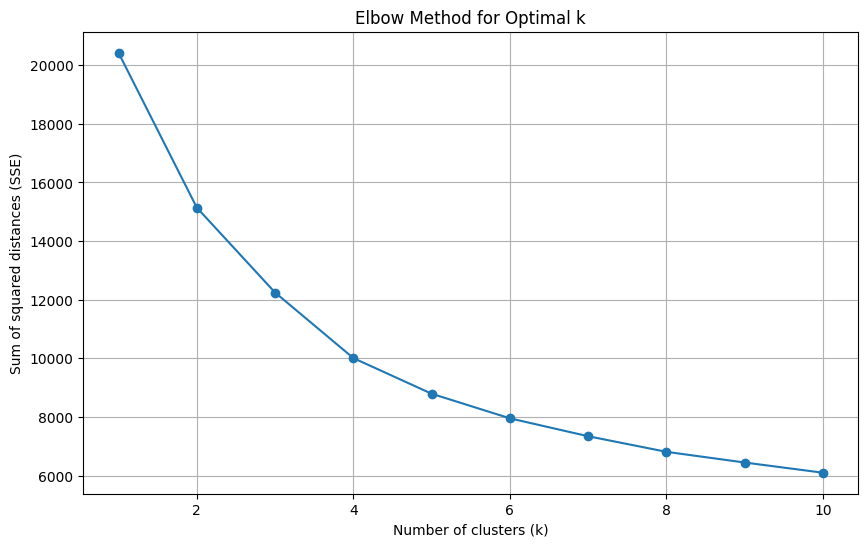

In [50]:
# Compute SSE for k=1 to k=10
K = range(1, 11)
sse = []
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)  # inertia_ is the SSE

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.grid(True)
plt.show()

## Method 1: Use Second Derivative of Sum of Squared Error

The optimal number of clusters (k) detected by the Second Derivative Method: 3


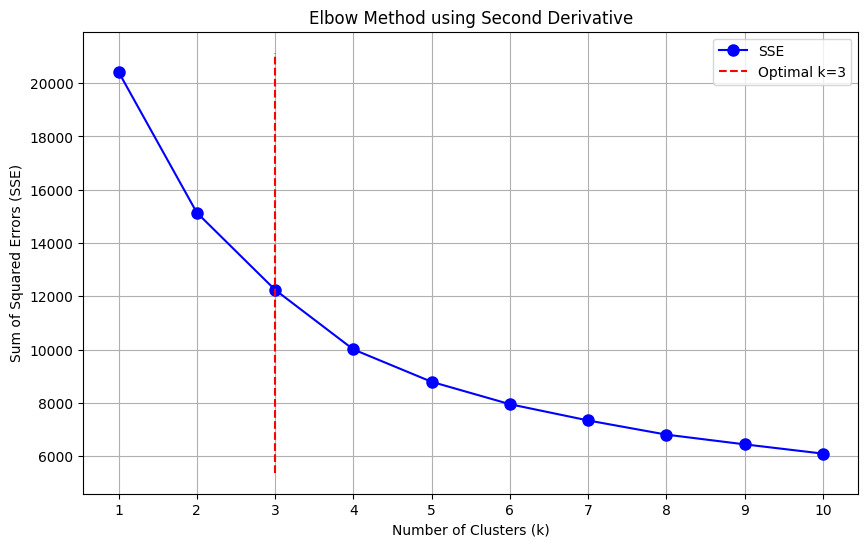

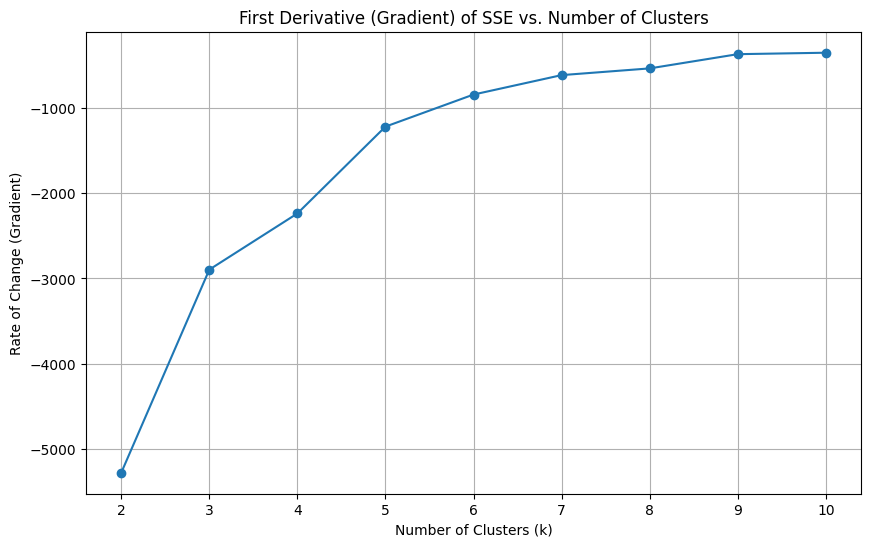

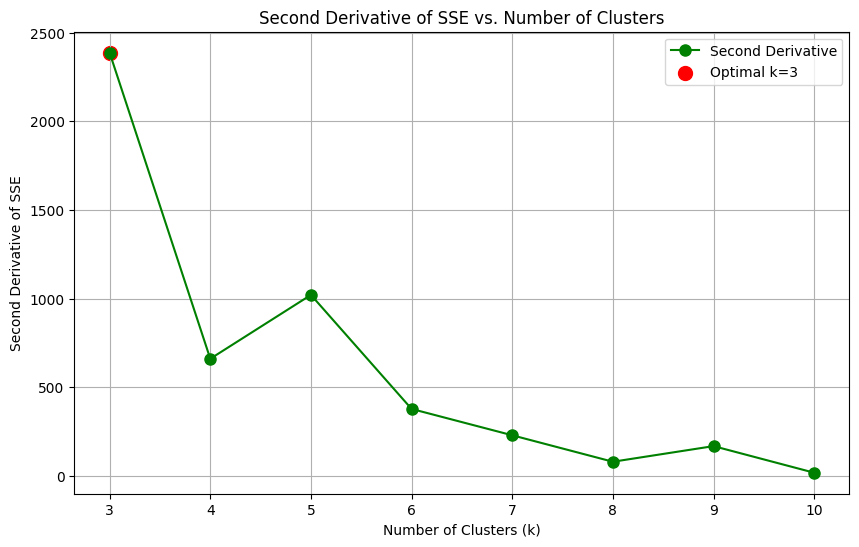

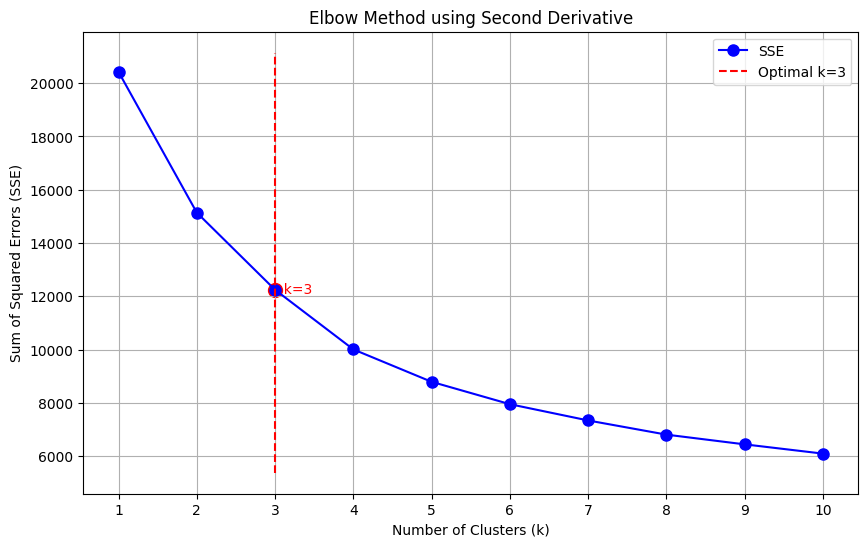

In [51]:
# Compute First and Second Derivatives
gradient = np.diff(sse)  # First derivative
second_derivative = np.diff(gradient)  # Second derivative

# Corresponding k values for the second derivative
k_second_derivative = K[2:]  # Since second_derivative has len(K)-2

# Identify the Optimal k
optimal_k = k_second_derivative[np.argmax(second_derivative)]
print(f"The optimal number of clusters (k) detected by the Second Derivative Method: {optimal_k}")

# Visualization

# a. Plot SSE vs. k with Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bo-', markersize=8, label='SSE')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method using Second Derivative')
plt.xticks(K)
plt.legend()
plt.grid(True)
plt.show()

# b. Plot First Derivative (Gradient)
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(sse) + 1), gradient, marker='o')
plt.title('First Derivative (Gradient) of SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Rate of Change (Gradient)')
plt.grid(True)
plt.show()

# c. Plot Second Derivative (Curvature)
plt.figure(figsize=(10, 6))
plt.plot(k_second_derivative, second_derivative, 'go-', markersize=8, label='Second Derivative')
plt.scatter(optimal_k, second_derivative[np.argmax(second_derivative)], color='red', s=100, label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Second Derivative of SSE')
plt.title('Second Derivative of SSE vs. Number of Clusters')
plt.xticks(k_second_derivative)
plt.legend()
plt.grid(True)
plt.show()

# d. Optional: Annotate the Optimal k on the SSE Plot
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bo-', markersize=8, label='SSE')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label=f'Optimal k={optimal_k}')
plt.scatter(optimal_k, sse[optimal_k-1], color='red', s=100)
plt.text(optimal_k, sse[optimal_k-1], f'  k={optimal_k}', color='red', va='center')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method using Second Derivative')
plt.xticks(K)
plt.legend()
plt.grid(True)
plt.show()


## Method 2: Use the Kneed Package to Automaticaly Detect Elbow

The optimal number of clusters (k) detected by Kneedle: 4


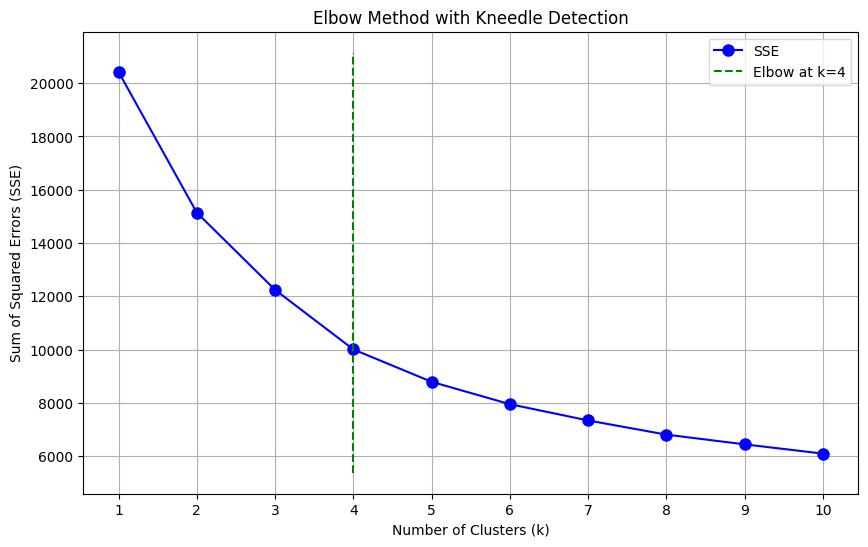

In [54]:
# Initialize KneeLocator
kneedle = KneeLocator(K, sse, curve='convex', direction='decreasing')

# Optimal k
optimal_k_kneedle = kneedle.knee
print(f"The optimal number of clusters (k) detected by Kneedle: {optimal_k_kneedle}")

# Plot with Kneedle detection
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bo-', markersize=8, label='SSE')
plt.vlines(optimal_k_kneedle, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='green', label=f'Elbow at k={optimal_k_kneedle}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method with Kneedle Detection')
plt.xticks(K)
plt.legend()
plt.grid(True)
plt.show()

## Plot KMean Model with 3 and 4 Clusters

In [58]:
# KMean Model with 3 Cluster
kmeans_3 = KMeans(n_clusters=3, random_state=0)
data['cluster_3'] = kmeans_3.fit_predict(scaled_df)

# KMean Model with 4 Cluster
kmeans_4 = KMeans(n_clusters=4, random_state=0)
data['cluster_4'] = kmeans_4.fit_predict(scaled_df)


## Visualize the Plot of each Model

### Cluster Model with K = 3

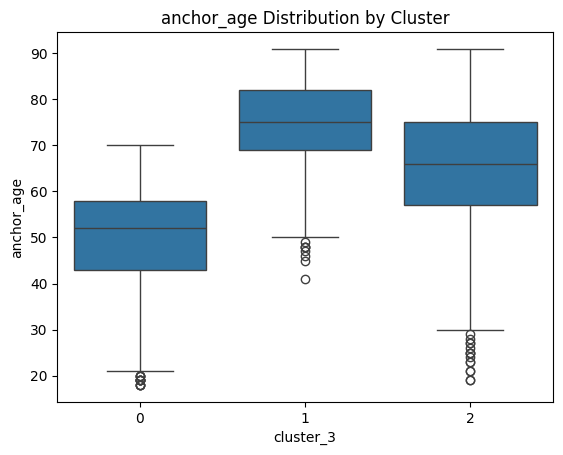

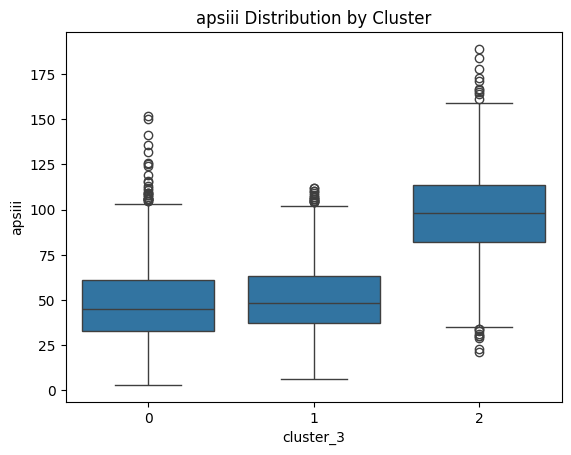

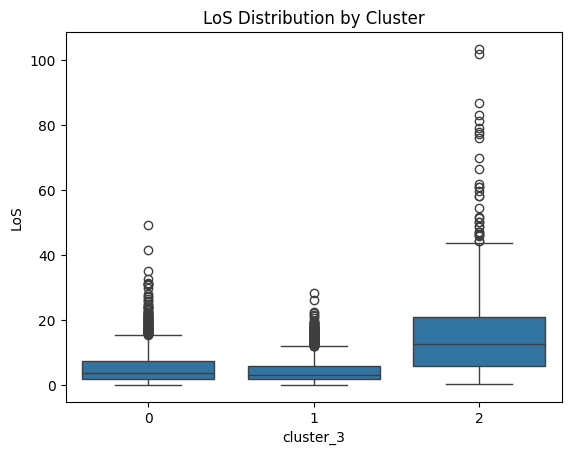

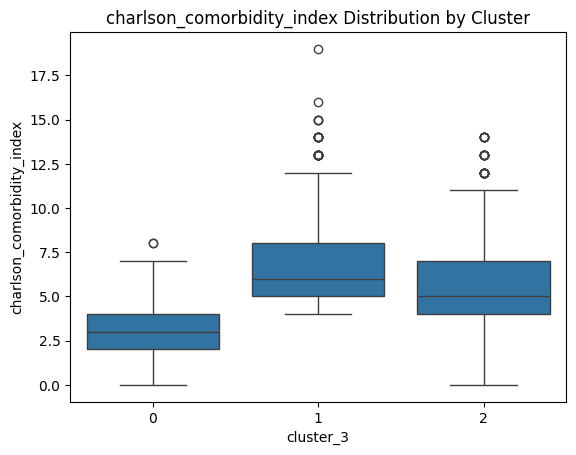

In [59]:
# Compare model with 3 clusters for all features using Box plot

for column in list(scaled_df.columns):
  sns.boxplot(x='cluster_3', y=column, data=data)
  plt.title(f'{column} Distribution by Cluster')
  plt.show()


<ipython-input-64-a994ae7ee833>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'Cluster ({k})', y='Mortality Rate', data=mortality_rates, palette='Set2')


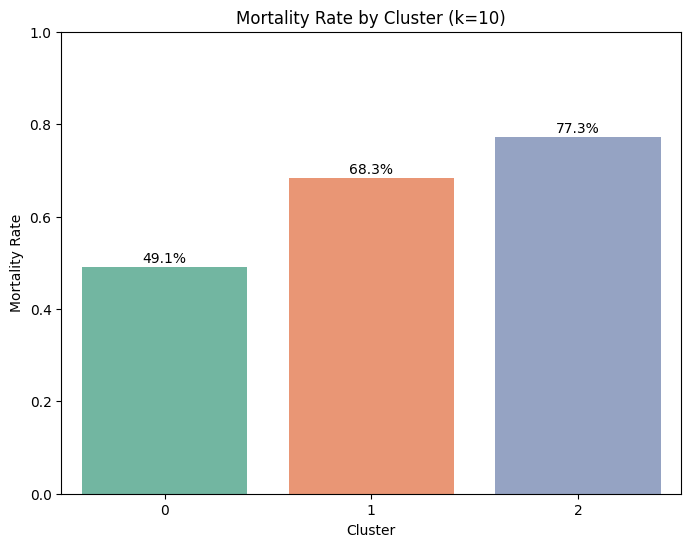

In [64]:
plt.figure(figsize=(8, 6))

# Calculate mortality rates per cluster
mortality_rates = data.groupby('cluster_3')['death_indicator'].mean().reset_index()

# Rename columns for better readability
mortality_rates.columns = [f'Cluster ({k})', 'Mortality Rate']

# Create a bar plot
sns.barplot(x=f'Cluster ({k})', y='Mortality Rate', data=mortality_rates, palette='Set2')

# Add percentage labels on top of the bars
for index, row in mortality_rates.iterrows():
    plt.text(index, row['Mortality Rate'] + 0.01, f"{row['Mortality Rate']*100:.1f}%",
              color='black', ha="center")

# Set plot titles and labels
plt.title(f'Mortality Rate by Cluster (k={k})')
plt.ylabel('Mortality Rate')
plt.ylim(0, 1)  # Since mortality rate is between 0 and 1
plt.xlabel('Cluster')

# Display the plot
plt.show()

### Cluster Model with K = 4

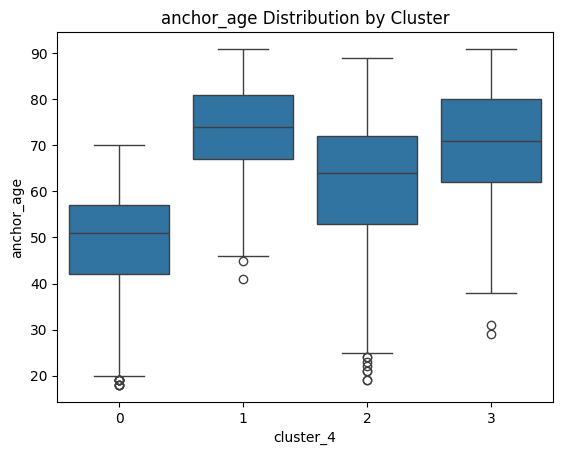

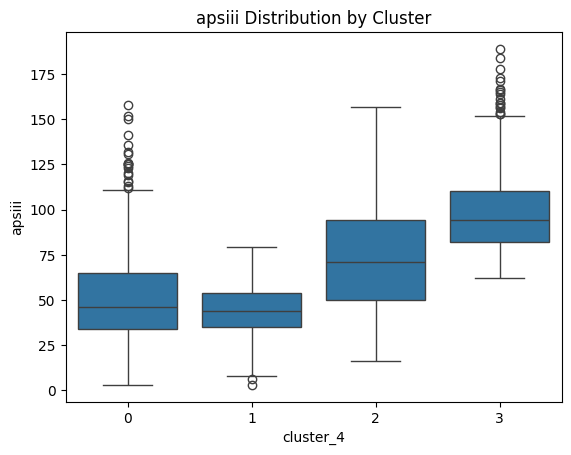

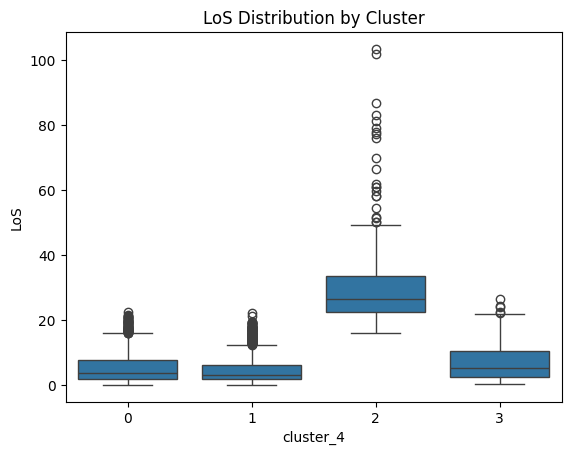

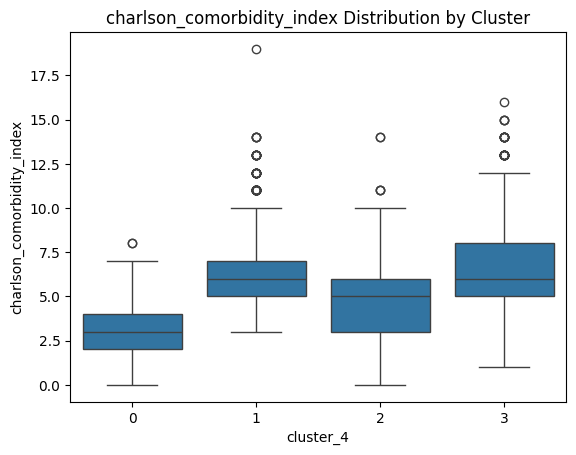

In [60]:
# Compare model with 4 clusters for all features using Box plot

for column in list(scaled_df.columns):
  sns.boxplot(x='cluster_4', y=column, data=data)
  plt.title(f'{column} Distribution by Cluster')
  plt.show()

<ipython-input-63-bfe5aa19b676>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'Cluster ({k})', y='Mortality Rate', data=mortality_rates, palette='Set2')


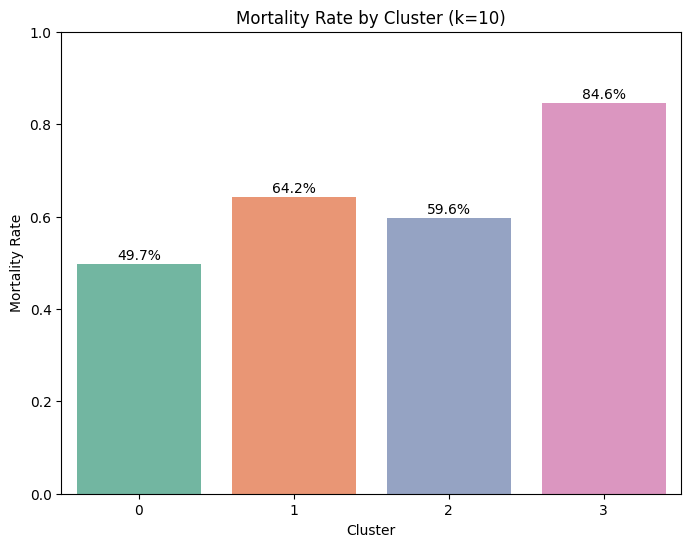

In [63]:
plt.figure(figsize=(8, 6))

# Calculate mortality rates per cluster
mortality_rates = data.groupby('cluster_4')['death_indicator'].mean().reset_index()

# Rename columns for better readability
mortality_rates.columns = [f'Cluster ({k})', 'Mortality Rate']

# Create a bar plot
sns.barplot(x=f'Cluster ({k})', y='Mortality Rate', data=mortality_rates, palette='Set2')

# Add percentage labels on top of the bars
for index, row in mortality_rates.iterrows():
    plt.text(index, row['Mortality Rate'] + 0.01, f"{row['Mortality Rate']*100:.1f}%",
              color='black', ha="center")

# Set plot titles and labels
plt.title(f'Mortality Rate by Cluster (k={k})')
plt.ylabel('Mortality Rate')
plt.ylim(0, 1)  # Since mortality rate is between 0 and 1
plt.xlabel('Cluster')

# Display the plot
plt.show()

In [65]:
!pip list --format=freeze > requirements.txt